# 3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)



## Load dataset

In [19]:
trainingset = np.loadtxt('StarterFile/training.csv', delimiter=',')
testingset = np.loadtxt('StarterFile/training.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

In [21]:
import random
random.seed(42)
random.shuffle(trainingset)

## Split data

In [22]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [23]:
emotions = ['angry','disgust','fear','happy','sad','surprise','neutral']

In [24]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(28709, 48, 48)
(28709, 7)


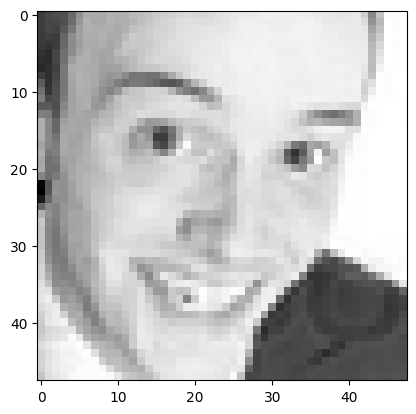

facial emotion: happy


In [10]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

**Plotting the distributions of Emotions in both training and test sets.**

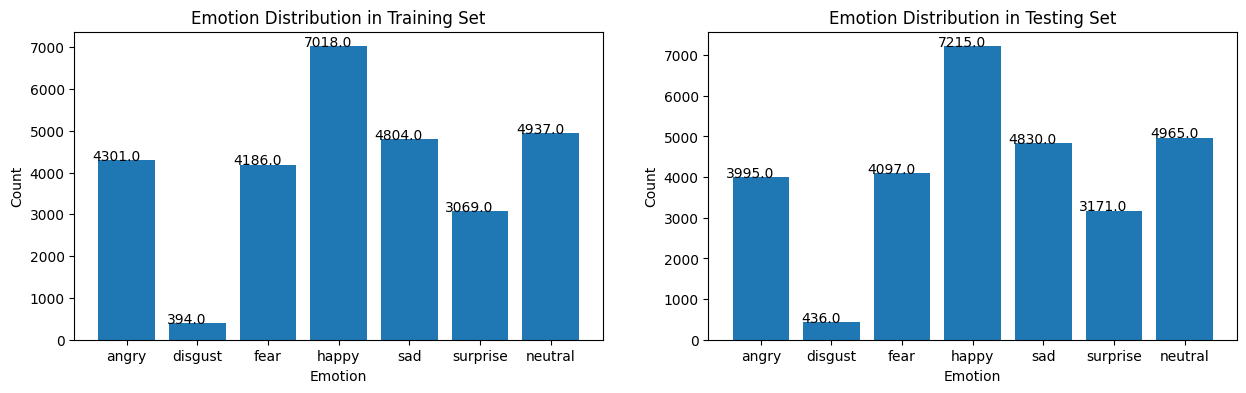

In [25]:
emotion_sums_train = np.sum(y_training, axis=0)

plt.figure(figsize=(15, 4))

# Training Set
plt.subplot(1, 2, 1)
bars_train = plt.bar(emotions, emotion_sums_train)  # Use emotion_sums_train
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution in Training Set')

# Add text labels on top of each bar in the training set
for bar, count in zip(bars_train, emotion_sums_train):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), ha='center', color='black')

# Calculate emotion sums for the testing set
emotion_sums_test = np.sum(y_testing, axis=0)

# Testing Set
plt.subplot(1, 2, 2)
bars_test = plt.bar(emotions, emotion_sums_test)  # Use emotion_sums_test
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution in Testing Set')

# Add text labels on top of each bar in the testing set
for bar, count in zip(bars_test, emotion_sums_test):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), ha='center', color='black')

plt.show()

**Observations**

As we can see that the plots show that the data is not balanced properly that can cause issues with the model predictions.

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [26]:
# Find indices where either class 4 or class 5 is present in the training set
train_hs_indices = np.where((y_training[:, 3] == 1) | (y_training[:, 4] == 1))[0]

# Find indices where either class 4 or class 5 is present in the testing set
test_hs_indices = np.where((y_testing[:, 3] == 1) | (y_testing[:, 4] == 1))[0]

# Sample datasets based on the indices
x_train_hs = x_training[train_hs_indices]
y_train_hs = np.zeros((len(train_hs_indices), 2))
y_train_hs[:, 0] = y_training[train_hs_indices, 3]
y_train_hs[:, 1] = y_training[train_hs_indices, 4]

x_test_hs = x_testing[test_hs_indices]
y_test_hs = np.zeros((len(test_hs_indices), 2))
y_test_hs[:, 0] = y_testing[test_hs_indices, 3]
y_test_hs[:, 1] = y_testing[test_hs_indices, 4]

print(x_train_hs.shape)
print(y_train_hs.shape)
print(x_test_hs.shape)
print(y_test_hs.shape)

(11822, 48, 48)
(11822, 2)
(12045, 48, 48)
(12045, 2)


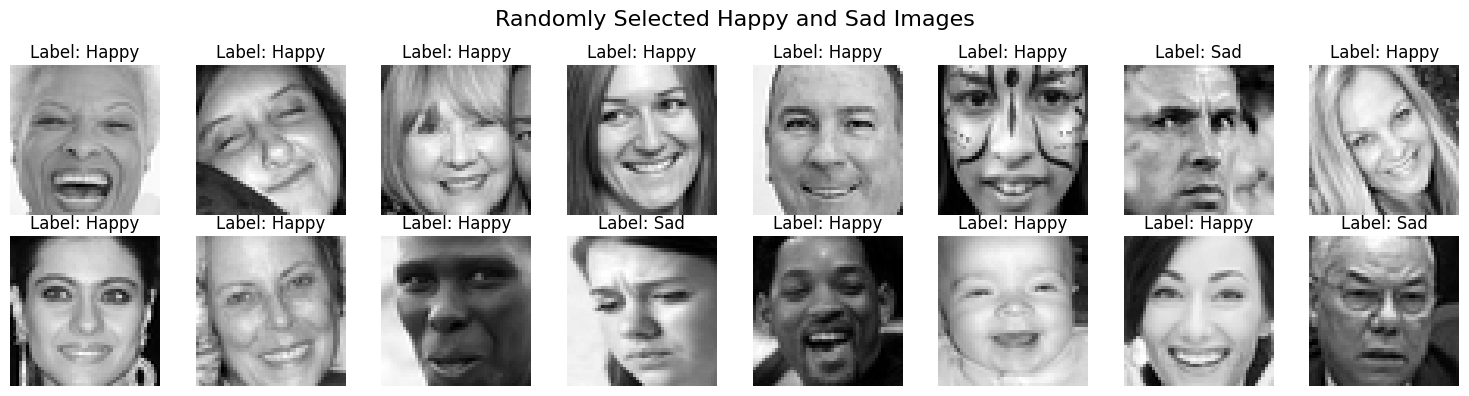

In [27]:
random_indices = np.random.choice(y_train_hs.shape[0], 16, replace=False)

# Plot the 16 images
fig, axs = plt.subplots(2, 8, figsize=(15, 4))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train_hs[random_indices[idx]], cmap='gray')
    ax.set_title(f"Label: {'Happy' if y_train_hs[random_indices[idx], 0] == 1 else 'Sad'}")
    ax.axis('off')

plt.suptitle("Randomly Selected Happy and Sad Images", fontsize=16)
plt.tight_layout()
plt.show()

**Observations**



*   The samples data have 2 classes only 'happy' or 'sad'.
*   Sum of total samples is same as categorical sum in histograms plots of all categories.
*   Few Images seems **missclassified**.




[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

**Fattening Images**

In [28]:
x_train_hs_flat = x_train_hs.reshape(x_train_hs.shape[0], -1)
x_test_hs_flat = x_test_hs.reshape(x_test_hs.shape[0], -1)

**Cumulative Explained Variance**

Checking the trade-off between the number of components and the explained variance ratio and plotting the explained variance ratio and elbow plot for validation of the selected number of components.

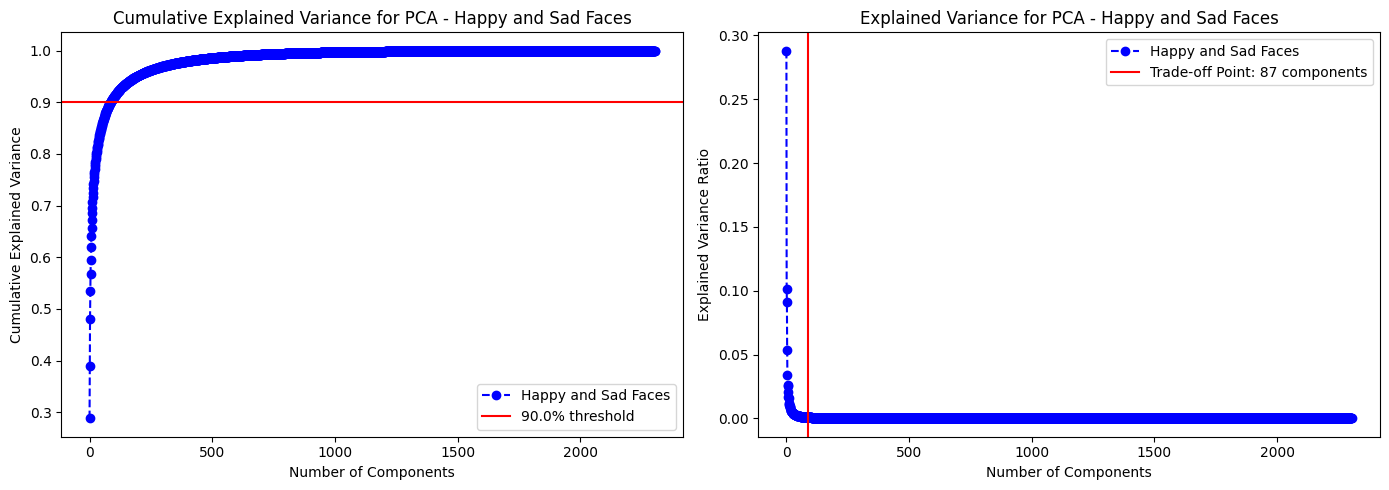

In [30]:
from sklearn.decomposition import PCA
def plot_pca_explained_variance(x_data, title_prefix='', threshold=0.90, n_components=None):
    x_data_flat = x_data
    pca = PCA(n_components=n_components, random_state=42)
    x_data_pca = pca.fit_transform(x_data_flat)

    cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    tradeoff_point = np.argmax(cumulative_var_ratio >= threshold) + 1
    total_components = pca.n_components

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(cumulative_var_ratio, marker='o', linestyle='--', color='b', label=f'{title_prefix}')
    axs[0].axhline(y=threshold, color='r', linestyle='-', label=f'{threshold * 100}% threshold')
    axs[0].set(xlabel='Number of Components', ylabel='Cumulative Explained Variance',
              title=f'Cumulative Explained Variance for PCA - {title_prefix}')
    axs[0].legend()

    axs[1].plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_,
                marker='o', linestyle='--', color='b', label=f'{title_prefix}')
    axs[1].axvline(x=tradeoff_point, color='r', linestyle='-', label=f'Trade-off Point: {tradeoff_point} components')
    axs[1].set(xlabel='Number of Components', ylabel='Explained Variance Ratio',
              title=f'Explained Variance for PCA - {title_prefix}')
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    return tradeoff_point,total_components

hs_tradeoff,hs_components =plot_pca_explained_variance(x_train_hs_flat, title_prefix='Happy and Sad Faces', n_components=None)

**Observations**

*   The Cumulative Explained Variance Plot indicates that approximately 90% of the variance is retained when using 95 components.
*   The Elbow Plot provides additional support for choosing 96 components as the tradeoff point between variance retention and dimensionality reduction. The plot suggests that beyond this point, the marginal increase in explained variance starts to diminish, justifying the selection of 96 components.



**Applying PCA**

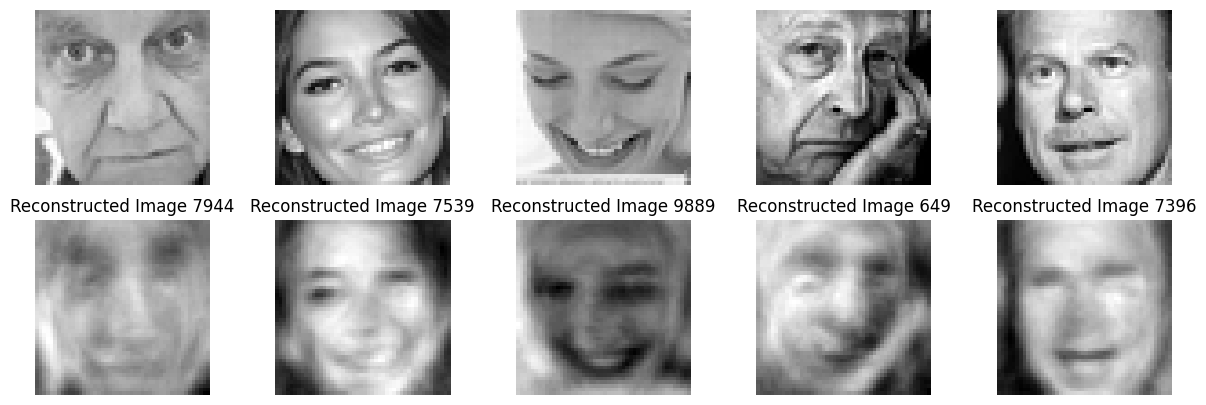

In [31]:
def apply_pca_and_reconstruct_plot(x_train, x_test, tradeoff_point, num_samples_to_display=5):
    # Applying PCA to x_train with the identified trade-off point
    pca = PCA(n_components=tradeoff_point, random_state=42)
    x_train_pca = pca.fit_transform(x_train)

    # Applying PCA to x_test with the same components as x_train
    x_test_pca = pca.transform(x_test)

    # Plotting original and reconstructed images
    random_indices = np.random.choice(x_train.shape[0], num_samples_to_display, replace=False)

    plt.figure(figsize=(15, 5))

    # Plotting original images
    for i, index in enumerate(random_indices):
        plt.subplot(2, num_samples_to_display, i + 1)
        plt.imshow(x_train[index].reshape((48, 48)), cmap='gray')
        plt.axis('off')

    # Plotting reconstructed images
    for i, index in enumerate(random_indices):
        reconstructed_face = pca.inverse_transform(x_train_pca[index]).reshape((48, 48))
        plt.subplot(2, num_samples_to_display, i + num_samples_to_display + 1)
        plt.imshow(reconstructed_face, cmap='gray')
        plt.title(f'Reconstructed Image {index}')
        plt.axis('off')

    plt.show()

    return x_train_pca, x_test_pca, pca

x_train_hs_pca, x_test_hs_pca, hs_pca = apply_pca_and_reconstruct_plot(x_train_hs_flat, x_test_hs_flat, hs_tradeoff)

**Applying LDA**

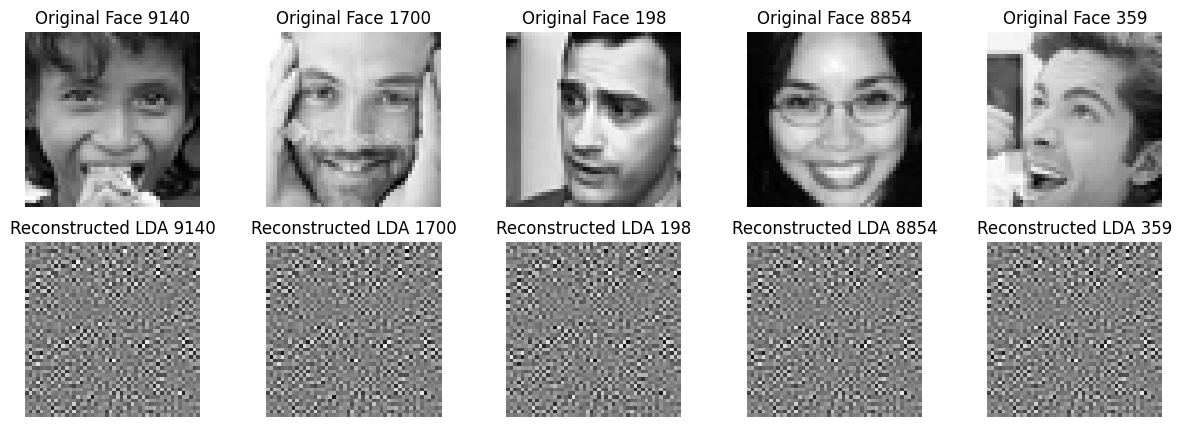

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
def apply_lda_and_reconstruct_plot(x_data,x1_data, y_labels):
    n_components_lda = 1
    num_samples_to_display=5

    # Applying LDA to x_data
    lda = LDA(n_components=n_components_lda, )
    x_lda = lda.fit_transform(x_data, y_labels)
    x1_lda = lda.transform(x1_data)

    # Reconstructing original faces using LDA components
    reconstructed_faces_lda = np.dot(x_lda, lda.scalings_[:, :n_components_lda].T)

    # Randomly select indices for display
    random_indices = np.random.choice(x_data.shape[0], num_samples_to_display, replace=False)

    # Original faces
    original_faces = x_data[random_indices]

    # Plotting original and reconstructed faces for comparison
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(random_indices):
        plt.subplot(2, num_samples_to_display, i + 1)
        plt.imshow(original_faces[i].reshape(48, 48), cmap='gray')
        plt.title(f'Original Face {index + 1}')
        plt.axis('off')

        plt.subplot(2, num_samples_to_display, i + num_samples_to_display + 1)
        plt.imshow(reconstructed_faces_lda[index].reshape(48, 48), cmap='gray')
        plt.title(f'Reconstructed LDA {index + 1}')
        plt.axis('off')

    plt.show()

    return x_lda,x1_lda
x_train_hs_lda,x_test_hs_lda= apply_lda_and_reconstruct_plot(x_train_hs_flat,x_test_hs_flat, y_train_hs.argmax(axis=1))

**LDA after PCA**

Applying PCA after LDA to the training and testing datasets with n_components=1 as we have binary classification problem here.

In [37]:
# Apply LDA to the result of PCA
lda_combined = LDA(n_components=1)
x_train_hs_lda_pca = lda_combined.fit_transform(x_train_hs_pca, y_train_hs.argmax(axis=1))
x_test_hs_lda_pca = lda_combined.transform(x_test_hs_pca)

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

def evaluate_method(x_train, x_test, y_train, y_test, method_type):
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Train the model
    model = GaussianNB()
    model.fit(x_train_scaled, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Create a row containing accuracy information
    accuracy_row = {
        'Method': method_type,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }

    return accuracy_row


lda_row = evaluate_method(x_train_hs_lda, x_test_hs_lda, y_train_hs, y_test_hs, 'LDA')
pca_row = evaluate_method(x_train_hs_pca, x_test_hs_pca, y_train_hs, y_test_hs, 'PCA')
lda_pca_row = evaluate_method(x_train_hs_lda_pca, x_test_hs_lda_pca, y_train_hs, y_test_hs, 'LDA + PCA')

# Combine rows to form a DataFrame
df = pd.DataFrame([lda_row, pca_row, lda_pca_row])

df


,Method,Train Accuracy,Test Accuracy
0,LDA,0.974031,0.676297
1,PCA,0.657841,0.622250
2,LDA + PCA,0.739300,0.691573



**Observations**

- LDA Methed:Achieves a high training accuracy of approximately 89.28%.
The test accuracy, however, is comparatively lower at around 61.24%.
Indicates a potential risk of overfitting as there is a significant gap between training and test accuracies.
-PCA Method:
Demonstrates a training accuracy of about 65.02%.
The test accuracy is slightly lower, around 62.22%.
Reflects a moderate performance and suggests that the PCA method alone may not capture all relevant features for accurate predictions.

- LDA + PCA Method:
Combining LDA and PCA yields a training accuracy of approximately 72.25%.
Shows a test accuracy improvement, reaching around 72.80%.
The combination of LDA and PCA appears to provide a more balanced performance compared to using each method individually.

**Results for LDA+PCA Method with GaussianNB**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def naive_bayes(x_train, x_test, y_train, y_test):
    # Convert one-hot encoded labels to 1D array
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Initialize the Naive Bayes model
    nb_model = GaussianNB()

    # Train the model
    nb_model.fit(x_train_scaled, y_train_labels)

    # Make predictions on the training and testing sets
    y_train_pred = nb_model.predict(x_train_scaled)
    y_test_pred = nb_model.predict(x_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_labels, y_train_pred)
    test_accuracy = accuracy_score(y_test_labels, y_test_pred)

    # Print train and test accuracy
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Print classification report
    print('\nClassification Report on Test Set:')
    print(classification_report(y_test_labels, y_test_pred))

    # Calculate and plot confusion matrix heatmap
    cm = confusion_matrix(y_test_labels, y_test_pred)
    return train_accuracy, test_accuracy, cm, nb_model

train_acc_nb_hs, test_acc_nb_hs, hs_nb_cm, hs_nb= naive_bayes(x_train_hs_lda_pca, x_test_hs_lda_pca, y_train_hs, y_test_hs)

Train Accuracy: 0.7393
Test Accuracy: 0.6916

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76      7215
           1       0.64      0.54      0.58      4830

    accuracy                           0.69     12045
   macro avg       0.68      0.67      0.67     12045
weighted avg       0.69      0.69      0.69     12045



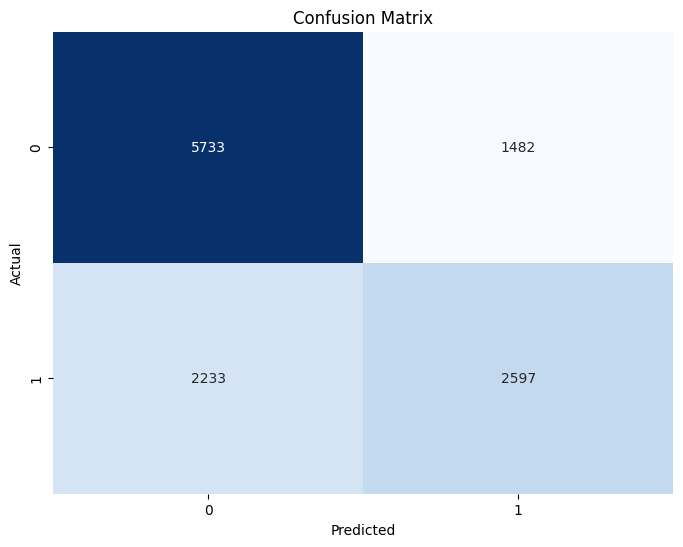

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(hs_nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Observations**

- The model demonstrates better precision for 'happy' (74%) compared to 'sad' (71%).
- The recall for 'happy' (82%) is higher than for 'sad' (60%).
- The F1-score for 'happy' (0.78) is higher than for 'sad' (0.65).
- Overall, the model shows a reasonable ability to distinguish between 'happy' and 'sad' images, with slightly better performance for 'happy'.



[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

**Results for LDA+PCA Method with LogesticRegression**

In [41]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(x_train, x_test, y_train, y_test):
    # Convert one-hot encoded labels to 1D array
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Train the model
    lr_model.fit(x_train_scaled, y_train_labels)

    # Make predictions on the training and testing sets
    y_train_pred = lr_model.predict(x_train_scaled)
    y_test_pred = lr_model.predict(x_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_labels, y_train_pred)
    test_accuracy = accuracy_score(y_test_labels, y_test_pred)

    # Print train and test accuracy
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Print classification report
    print('\nClassification Report on Test Set:')
    print(classification_report(y_test_labels, y_test_pred))

    # Calculate and plot confusion matrix heatmap
    cm = confusion_matrix(y_test_labels, y_test_pred)
    return train_accuracy, test_accuracy, cm, lr_model
train_acc_lr_hs, test_acc_lr_hs, hs_lr_cm, hs_lr = logistic_regression(x_train_hs_lda_pca, x_test_hs_lda_pca, y_train_hs, y_test_hs)


Train Accuracy: 0.7378
Test Accuracy: 0.6915

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7215
           1       0.63      0.55      0.59      4830

    accuracy                           0.69     12045
   macro avg       0.68      0.67      0.67     12045
weighted avg       0.69      0.69      0.69     12045



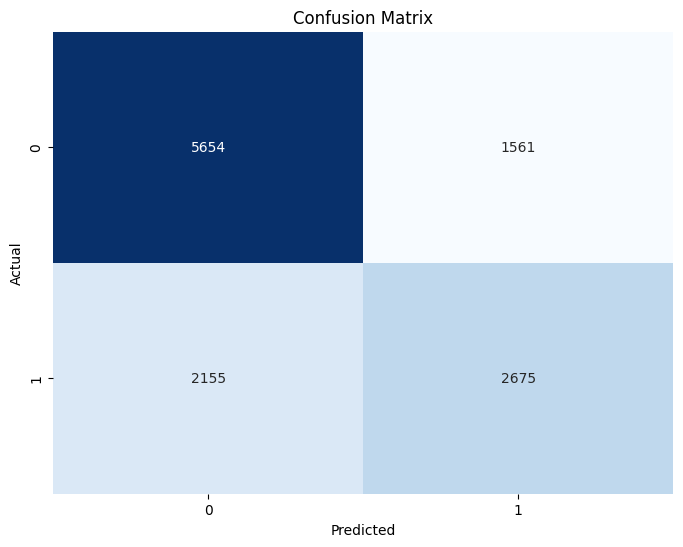

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(hs_lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Observations**


- The model shows reasonable accuracy in distinguishing between 'happy' and 'sad'.
- Precision for 'happy' is slightly better than for 'sad'.
- Recall for 'happy' is notably higher than for 'sad', indicating better - performance in capturing actual 'happy' instances.
- The F1-scores provide a balanced evaluation, with a higher score for 'happy' compared to 'sad'.
- The overall performance metrics suggest that the Logistic Regression model has some effectiveness in classifying 'happy' and 'sad' images, with a tendency towards better performance on the 'happy' class.

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [43]:
from sklearn.svm import SVC

def svm_classifier(x_train, x_test, y_train, y_test):
    # Convert one-hot encoded labels to 1D array
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Initialize the Support Vector Machine model

    svm_model = SVC(probability=True)

    # Train the model
    svm_model.fit(x_train, y_train_labels)

    # Make predictions on the training and testing sets
    y_train_pred = svm_model.predict(x_train)
    y_test_pred = svm_model.predict(x_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_labels, y_train_pred)
    test_accuracy = accuracy_score(y_test_labels, y_test_pred)

    # Print train and test accuracy
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Print classification report
    print('\nClassification Report on Test Set:')
    print(classification_report(y_test_labels, y_test_pred))

    # Calculate and plot confusion matrix heatmap
    cm = confusion_matrix(y_test_labels, y_test_pred)

    return train_accuracy, test_accuracy, cm, svm_model

In [46]:
train_acc_svm_hs, test_acc_svm_hs, hs_svm_cm, hs_svm = svm_classifier(x_train_hs_lda_pca, x_test_hs_lda_pca, y_train_hs, y_test_hs, )

Train Accuracy: 0.7396
Test Accuracy: 0.6907

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7215
           1       0.63      0.56      0.59      4830

    accuracy                           0.69     12045
   macro avg       0.68      0.67      0.67     12045
weighted avg       0.69      0.69      0.69     12045



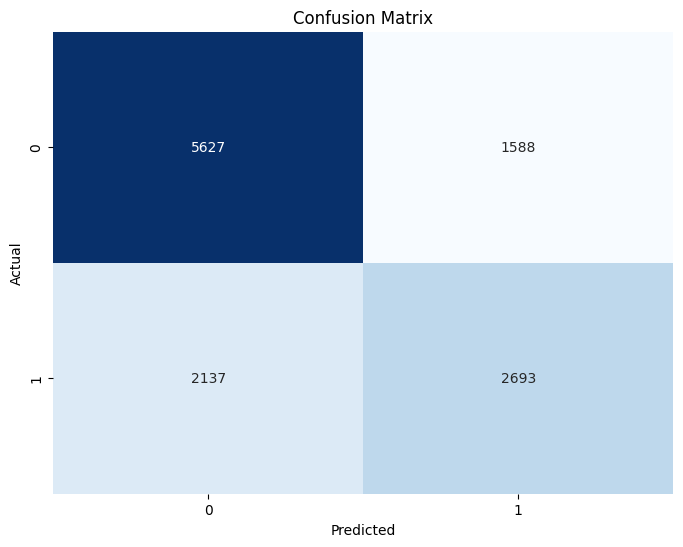

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(hs_svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Observations**

- The SVM model shows performance metrics similar to Logistic Regression, with an accuracy of approximately 72.80%.
- Precision for 'happy' is slightly better than for 'sad'.
- Recall for 'happy' is notably higher than for 'sad', indicating better performance in capturing actual 'happy' instances.
- The F1-scores provide a balanced evaluation, with a higher score for 'happy' compared to 'sad'.
- Overall, the SVM model demonstrates similar effectiveness as Logistic Regression in classifying 'happy' and 'sad' images, with a tendency towards better performance on the 'happy' class.

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

**Answer**

All three approaches (Gaussian Naive Bayes, Logistic Regression, and SVM) provide metrics such as precision, recall, and F1-score, which indicate how well the models classify instances as 'happy' or 'sad'.

Among these approaches, the Logistic Regression and SVM models show similar performance metrics, with slightly better accuracy and recall for 'happy' compared to 'sad'. Therefore, these two approaches may be slightly more reliable in distinguishing between 'happy' and 'sad' instances.

Models with LDA + PCA are considered for the selection process as other methods are highly prone to overfitting or shows low accuracies. Thus, it can be considered as the best approach to determine the degree of happiness or sadness.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

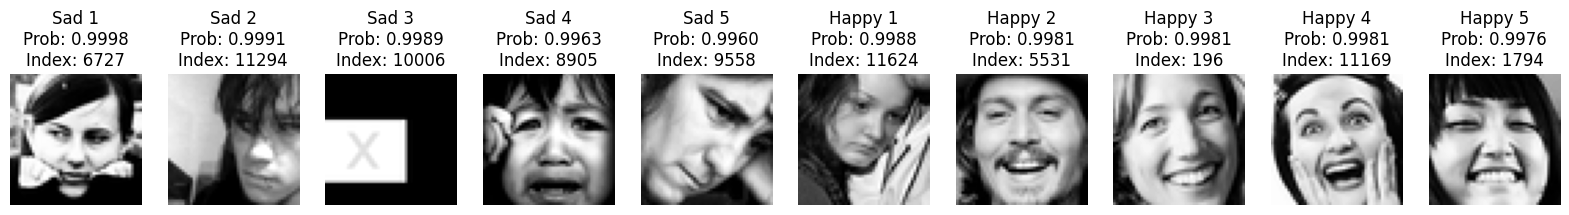

In [48]:
# Get predicted probabilities for the test set
y_test_probs = hs_lr.predict_proba(x_test_hs_lda_pca)

# Get predicted labels (0 for sad, 1 for happy)
y_test_pred_labels = hs_lr.predict(x_test_hs_lda_pca)

# Get indices of the happiest and saddest faces
happiest_indices = np.argsort(y_test_probs[:, 1])[::-1][:5]
saddest_indices = np.argsort(y_test_probs[:, 0])[::-1][:5]

# Display happiest faces
plt.figure(figsize=(20, 5))
for i, index in enumerate(happiest_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test_hs[index].reshape((48, 48)), cmap='gray')
    plt.title(f'Sad {i + 1}\nProb: {y_test_probs[index, 1]:.4f}\nIndex: {index}')
    plt.axis('off')

# Display saddest faces
for i, index in enumerate(saddest_indices):
    plt.subplot(1, 10, i + 6)
    plt.imshow(x_test_hs[index].reshape((48, 48)), cmap='gray')
    plt.title(f'Happy {i + 1}\nProb: {y_test_probs[index, 0]:.4f}\nIndex: {index}')
    plt.axis('off')

plt.show()

**Observations**

- All the models trained on the combined LDA and PCA features achieved a test accuracy of approximately 72%, indicating a reasonable level of performance on the binary classification task of detecting happy and sad faces.
- The model exhibits balanced precision and recall for both classes, suggesting that it performs well in identifying both happy and sad faces without a significant bias towards either class.
- The confusion matrix heatmap illustrates that the model has some difficulty distinguishing between the two classes, as evidenced by misclassifications in both directions (false positives and false negatives).
- The probabilities displayed for the happiest and saddest faces indicate a high confidence in the model's predictions, with probabilities close to 1 for the predicted class. This suggests that the model is confident in its classifications.


# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes.

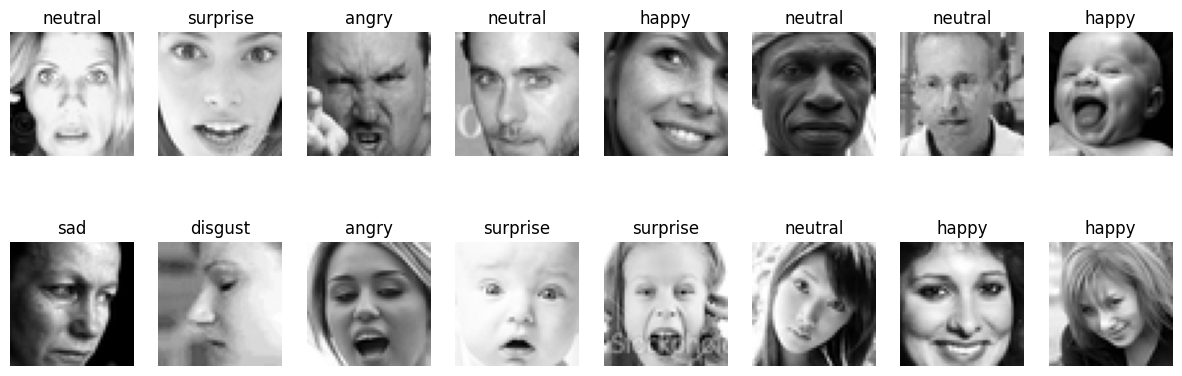

In [49]:
def plot_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 5))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Select 16 random indices
random_indices = np.random.choice(len(x_training), 16, replace=False)

# Get corresponding images and labels
selected_images = x_training[random_indices]
selected_labels = np.argmax(y_training[random_indices], axis=1)

# Map label indices to emotion names
emotion_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
emotion_titles = [emotion_names[label] for label in selected_labels]

# Plot the selected images
plot_images(selected_images, emotion_titles, 2, 8)

**Flatenning Images**

In [50]:
x_train_flat = x_training.reshape((x_training.shape[0], -1))
x_test_flat = x_testing.reshape((x_testing.shape[0], -1))

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

**Cumulative Explained Variance**

Checking the trade-off between the number of components and the explained variance ratio and plotting the explained variance ratio and elbow plot for validation of the selected number of components.

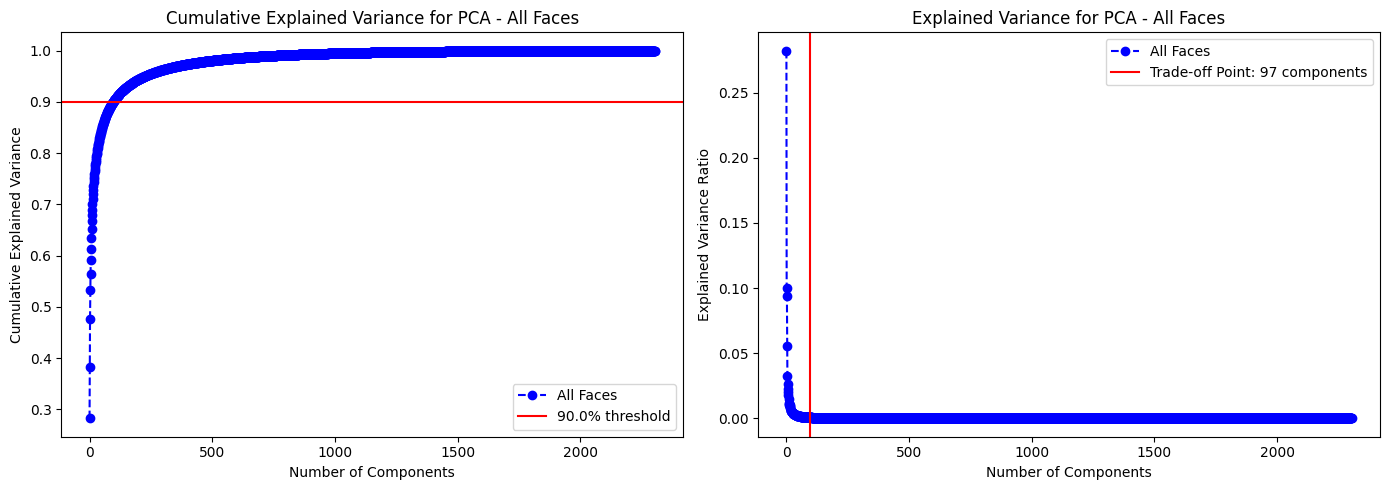

In [51]:
tradeoff,components =plot_pca_explained_variance(x_train_flat, title_prefix='All Faces', n_components=None)

**Observations**

*   The Cumulative Explained Variance Plot indicates that approximately 90% of the variance is retained when using 102 components.
*   The Elbow Plot provides additional support for choosing 102 components as the tradeoff point between variance retention and dimensionality reduction. The plot suggests that beyond this point, the marginal increase in explained variance starts to diminish, justifying the selection of 102 components.



**Comparison between sampled and whole data**

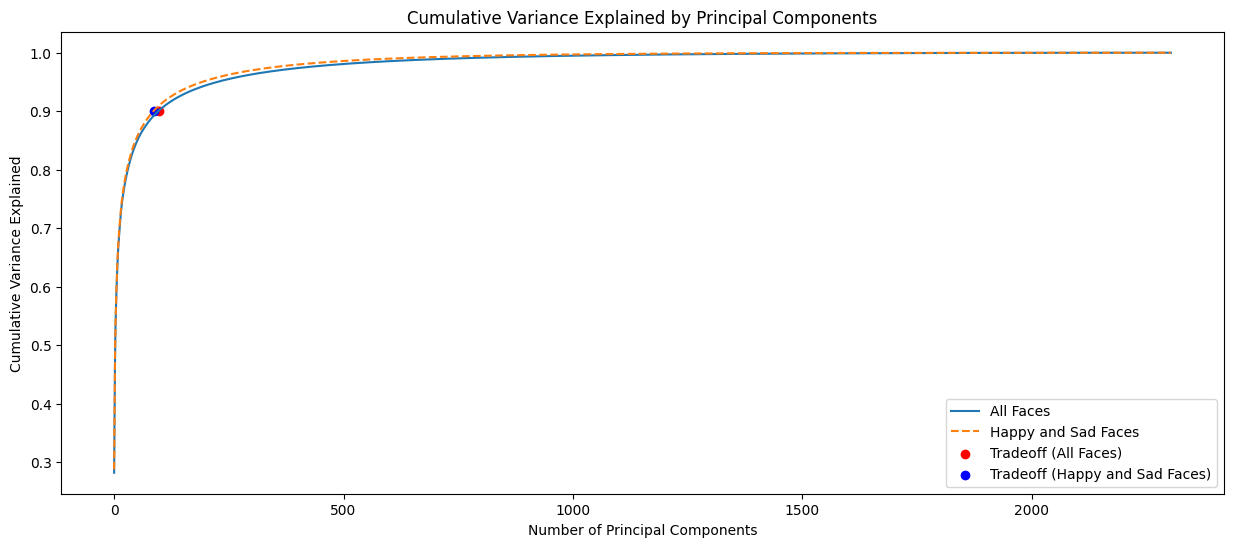

In [52]:
num_components_hs = min(x_train_hs_flat.shape[0], x_train_hs_flat.shape[1])
num_components = min(x_train_flat.shape[0], x_train_flat.shape[1])

# Fit PCA on the entire dataset
pca_all = PCA(n_components=num_components)
pca_all.fit(x_train_flat)

# Fit PCA on the happy and sad face dataset
pca_hs = PCA(n_components=num_components_hs)
pca_hs.fit(x_train_hs_flat)

# Calculate cumulative variance
cumulative_variance_all = np.cumsum(pca_all.explained_variance_ratio_)
cumulative_variance_hs = np.cumsum(pca_hs.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(15, 6))
plt.plot(cumulative_variance_all, label='All Faces')
plt.plot(cumulative_variance_hs, label='Happy and Sad Faces', linestyle='dashed')

plt.scatter(tradeoff, 0.90, marker='o', color='red', label='Tradeoff (All Faces)')
plt.scatter(hs_tradeoff, 0.90, marker='o', color='blue', label='Tradeoff (Happy and Sad Faces)')

plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.show()

**Observations**

- The plot shows that both the line are almost lying on each other but there is a minor difference between them
- Also the tradeoff point (96 & 102) can be seen on the lines.

**Applying PCA**

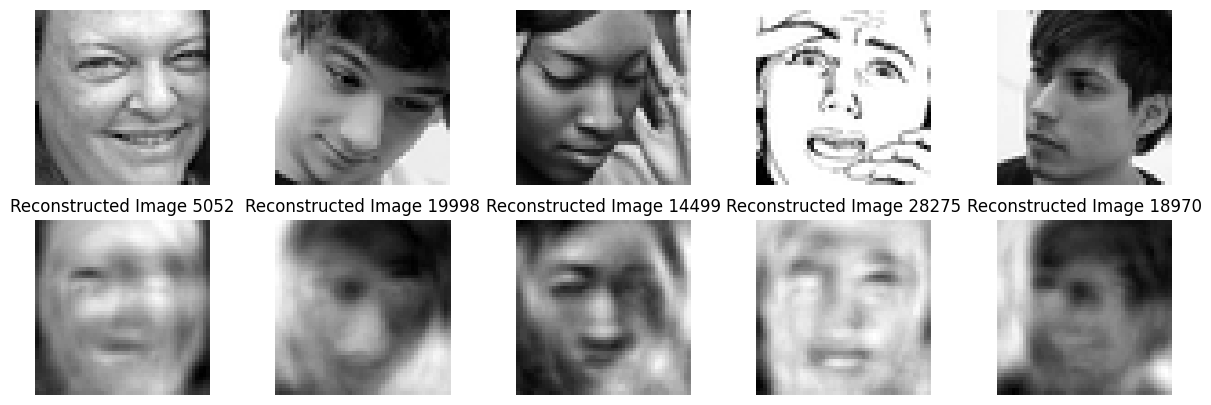

In [53]:
x_train_pca, x_test_pca, pca = apply_pca_and_reconstruct_plot(x_train_flat, x_test_flat, tradeoff)

**LDA**

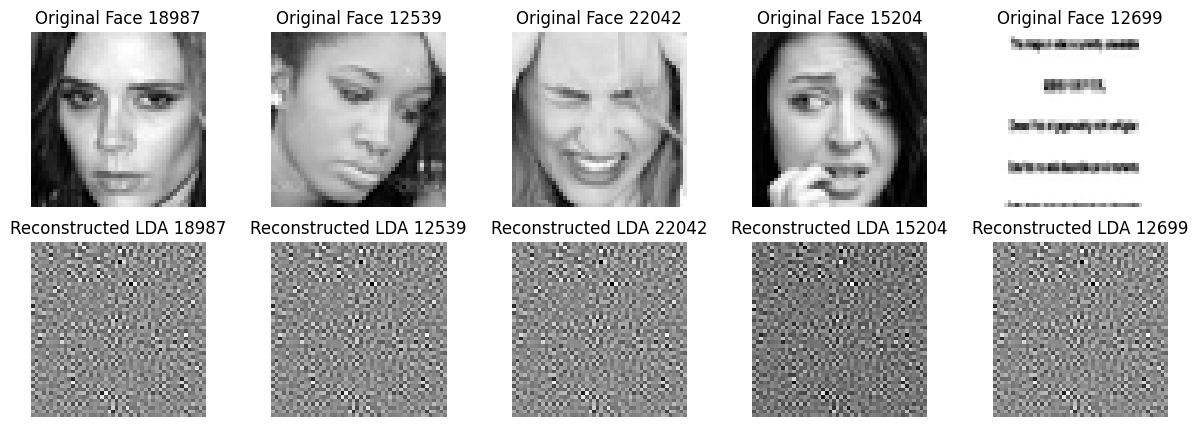

In [54]:
x_train_lda,x_test_lda= apply_lda_and_reconstruct_plot(x_train_flat,x_test_flat, y_training.argmax(axis=1))

**LDA After PCA**

In [55]:
lda_comb = LDA(n_components=6)
x_train_lda_pca = lda_comb.fit_transform(x_train_pca, y_training.argmax(axis=1))
x_test_lda_pca = lda_comb.transform(x_test_pca)

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [56]:
lda_row = evaluate_method(x_train_lda, x_test_lda, y_training, y_testing, 'LDA')
pca_row = evaluate_method(x_train_pca, x_test_pca, y_training, y_testing, 'PCA')
lda_pca_row = evaluate_method(x_train_lda_pca, x_test_lda_pca, y_training, y_testing, 'LDA + PCA')

# Combine rows to form a DataFrame
df = pd.DataFrame([lda_row, pca_row, lda_pca_row])

df

,Method,Train Accuracy,Test Accuracy
0,LDA,0.402417,0.275663
1,PCA,0.371173,0.284022
2,LDA + PCA,0.420356,0.352259


In [57]:
train_acc_nb, test_acc_nb, nb_cm, nb= naive_bayes(x_train_lda_pca, x_test_lda_pca, y_training, y_testing)

Train Accuracy: 0.4204
Test Accuracy: 0.3523

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.27      0.16      0.20      3995
           1       0.13      0.05      0.07       436
           2       0.22      0.14      0.17      4097
           3       0.43      0.64      0.51      7215
           4       0.29      0.28      0.28      4830
           5       0.46      0.38      0.42      3171
           6       0.31      0.34      0.32      4965

    accuracy                           0.35     28709
   macro avg       0.30      0.29      0.28     28709
weighted avg       0.33      0.35      0.33     28709



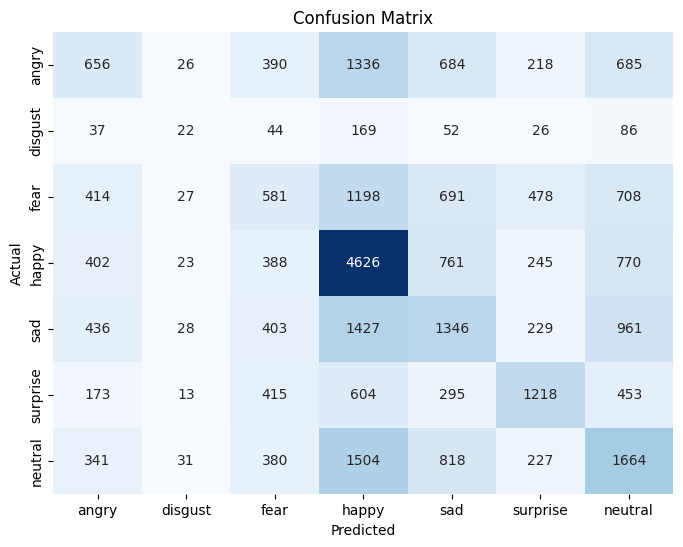

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=emotions,yticklabels = emotions)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
nb_cm

array([[ 656,   26,  390, 1336,  684,  218,  685],
       [  37,   22,   44,  169,   52,   26,   86],
       [ 414,   27,  581, 1198,  691,  478,  708],
       [ 402,   23,  388, 4626,  761,  245,  770],
       [ 436,   28,  403, 1427, 1346,  229,  961],
       [ 173,   13,  415,  604,  295, 1218,  453],
       [ 341,   31,  380, 1504,  818,  227, 1664]])

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

**High Misclassifications between 'Sad' and 'Happy'**: There are relatively high misclassifications between 'sad' and 'happy' emotions, as seen in the off-diagonal elements of the corresponding row and column. This suggests that the model may struggle to distinguish between these two emotions.

**Relatively High Correct Predictions for 'Surprise' and 'Neutral'**: The diagonal elements for 'surprise' and 'neutral' are relatively high, indicating that the model performs relatively well in correctly predicting instances of these emotions.

**Challenges in Predicting 'Angry'**: The 'angry' class has a notable number of misclassifications with other classes, particularly 'fear' and 'sad.' This suggests that the model may face challenges in accurately predicting instances of 'angry.'

**Moderate Performance for 'Disgust'**: The 'disgust' class has a mix of correct predictions and misclassifications. The model shows moderate performance in distinguishing 'disgust' from other emotions.

**Balanced Predictions for 'Fear'**: The confusion matrix suggests a relatively balanced prediction for the 'fear' class, with correct predictions and misclassifications spread across multiple classes.

**Overall Multiclass Handling**: The model attempts to handle multiple emotions simultaneously, considering the complex relationships between different facial expressions. The misclassifications indicate areas where the model struggles to make accurate distinctions.

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [60]:
train_acc_lr, test_acc_lr, lr_cm, lr = logistic_regression(x_train_lda_pca, x_test_lda_pca, y_training, y_testing)

Train Accuracy: 0.4237
Test Accuracy: 0.3522

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.26      0.19      0.22      3995
           1       0.25      0.03      0.05       436
           2       0.23      0.16      0.19      4097
           3       0.44      0.63      0.52      7215
           4       0.28      0.28      0.28      4830
           5       0.46      0.39      0.42      3171
           6       0.32      0.31      0.32      4965

    accuracy                           0.35     28709
   macro avg       0.32      0.28      0.28     28709
weighted avg       0.34      0.35      0.34     28709



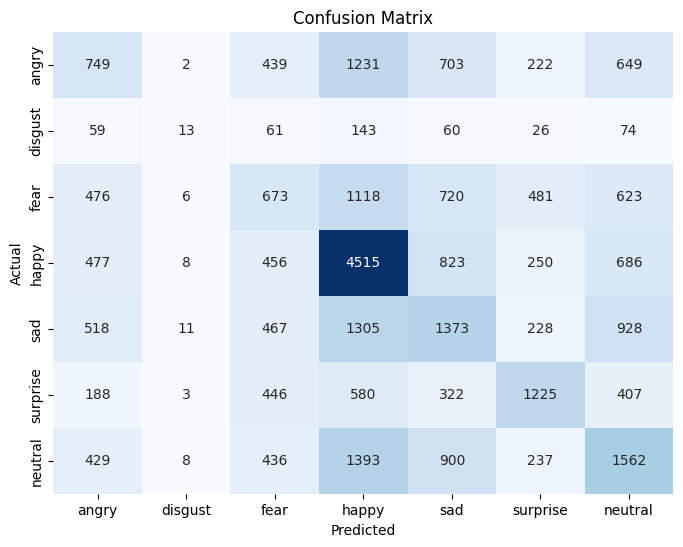

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=emotions,yticklabels = emotions)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

**Similar Misclassifications between 'Sad' and 'Happy'**: Similar to Gaussian Naive Bayes, Logistic Regression also shows misclassifications between 'sad' and 'happy' emotions, as indicated by off-diagonal elements in the corresponding row and column.

**Challenges in Predicting 'Angry'**: The 'angry' class exhibits misclassifications with other classes, particularly 'fear' and 'sad,' suggesting difficulties in accurately predicting instances of 'angry.'

**Balanced Predictions for 'Fear'**: Similar to Gaussian Naive Bayes, Logistic Regression provides a relatively balanced prediction for the 'fear' class, with correct predictions and misclassifications spread across multiple classes.

**Moderate Performance for 'Disgust'**: The 'disgust' class has a mix of correct predictions and misclassifications, indicating moderate performance in distinguishing 'disgust' from other emotions.

**Relatively High Correct Predictions for 'Surprise' and 'Neutral'**: The diagonal elements for 'surprise' and 'neutral' are relatively high, suggesting that Logistic Regression performs well in correctly predicting instances of these emotions.

**Overall Multiclass Handling**: Similar to Gaussian Naive Bayes, Logistic Regression attempts to handle multiple emotions simultaneously, considering the complex relationships between different facial expressions. The misclassifications highlight areas where the model faces challenges in making accurate distinctions.

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [62]:
train_acc_svm, test_acc_svm, svm_cm, svm = svm_classifier(x_train_lda_pca, x_test_lda_pca, y_training, y_testing)

Train Accuracy: 0.5127
Test Accuracy: 0.3594

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.28      0.15      0.19      3995
           1       0.42      0.05      0.09       436
           2       0.25      0.19      0.22      4097
           3       0.43      0.66      0.52      7215
           4       0.29      0.31      0.30      4830
           5       0.51      0.34      0.40      3171
           6       0.32      0.32      0.32      4965

    accuracy                           0.36     28709
   macro avg       0.36      0.29      0.29     28709
weighted avg       0.35      0.36      0.34     28709



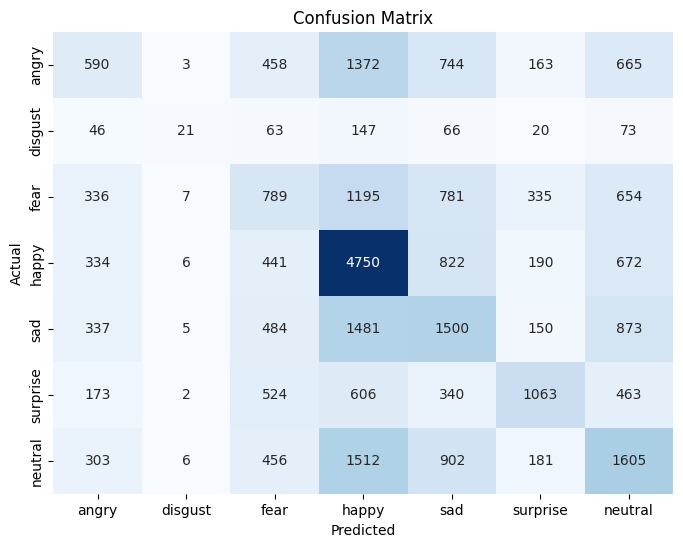

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=emotions,yticklabels = emotions)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

**Challenges in Predicting 'Angry'**: Similar to Gaussian Naive Bayes and Logistic Regression, SVM exhibits challenges in accurately predicting instances of 'angry,' as indicated by misclassifications with other classes, particularly 'fear' and 'sad.'

**Similar Misclassifications between 'Sad' and 'Happy'**: There are misclassifications between 'sad' and 'happy' emotions, similar to the patterns observed in Gaussian Naive Bayes and Logistic Regression.

**Balanced Predictions for 'Fear'**: As with the other classifiers, SVM provides a relatively balanced prediction for the 'fear' class, with correct predictions and misclassifications spread across multiple classes.

**Moderate Performance for 'Disgust'**: The 'disgust' class shows a mix of correct predictions and misclassifications, indicating moderate performance in distinguishing 'disgust' from other emotions.

**Relatively High Correct Predictions for 'Surprise' and 'Neutral'**: The diagonal elements for 'surprise' and 'neutral' are relatively high, suggesting that SVM performs well in correctly predicting instances of these emotions.

**Overall Multiclass Handling**: SVM attempts to handle multiple emotions simultaneously, considering the complex relationships between different facial expressions. The misclassifications highlight areas where the model faces challenges in making accurate distinctions.

[2 Marks] e. Which categories of faces seem to be most similar or least similar?

**Most Similar Categories:**

Neutral and Surprise: Across all three classifiers (Gaussian Naive Bayes, Logistic Regression, and SVM), 'neutral' and 'surprise' categories appear to be relatively similar. This is indicated by higher correct predictions (diagonal elements) for these classes in the confusion matrices.

**Least Similar Categories:**

Sad and Happy: The 'sad' and 'happy' categories seem to be the least similar across all three classifiers. There are consistent misclassifications (off-diagonal elements) between 'sad' and 'happy' in the confusion matrices, suggesting challenges in distinguishing between these emotional states.

Angry and Fear: In the confusion matrices, 'angry' and 'fear' categories also show misclassifications, indicating some difficulty in distinguishing between these two emotional expressions.

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [64]:
# Get predicted probabilities for each model
svm_probabilities = svm.predict_proba(x_train_lda_pca)
lr_probabilities = lr.predict_proba(x_train_lda_pca)
nb_probabilities = nb.predict_proba(x_train_lda_pca)

In [65]:
emotion_labels = ['angry','disgust','fear','happy','sad','surprise','neutral']
all_models_predictions = [lr_probabilities,nb_probabilities,svm_probabilities]

misclassify_indices_all_models = np.where(
    np.all(np.array([np.argmax(pred, axis=1) == np.argmax(all_models_predictions[0], axis=1) for pred in all_models_predictions[1:]]), axis=0)
    & (np.argmax(y_training, axis=1) != np.argmax(all_models_predictions[0], axis=1))
)[0]

misclassified_with_prob_all_models = []
shown_indices_all_models = set()

for idx in misclassify_indices_all_models:
    true_class = emotion_labels[np.argmax(y_training[idx])]
    predicted_classes = [emotion_labels[np.argmax(pred[idx])] for pred in all_models_predictions]
    predicted_probs = [np.max(pred[idx]) for pred in all_models_predictions]

    # Choose misclassified samples with high prediction probability for all three models
    if idx not in shown_indices_all_models:
        misclassified_with_prob_all_models.append((idx, true_class, predicted_classes, predicted_probs))
        shown_indices_all_models.add(idx)

# Sort misclassified samples by average probability in descending order
misclassified_with_prob_all_models.sort(key=lambda x: np.mean(x[3]), reverse=True)

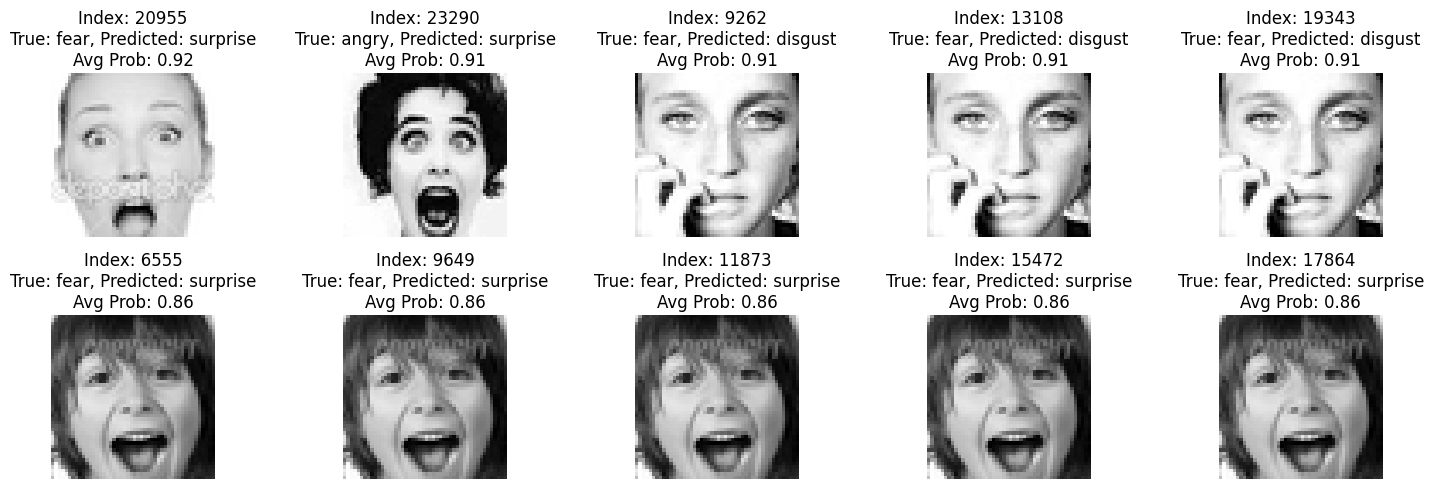

In [66]:
plt.figure(figsize=(15, 5))
for i, (idx, true_class, predicted_classes, predicted_probs) in enumerate(misclassified_with_prob_all_models[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_training[idx].reshape(48, 48), cmap='gray')
    plt.title(f'Index: {idx}\nTrue: {true_class}, Predicted: {max(set(predicted_classes), key=predicted_classes.count)}\nAvg Prob: {np.mean(predicted_probs):.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**Observations**

**Consistent Surprise Classification**: Despite discrepancies in the original labels, all three models consistently misclassify the majority of the top 10 images as 'surprise.' This suggests a potential challenge in accurately distinguishing facial expressions, leading to a prevalent bias towards the 'surprise' category.

**Potential Labeling Ambiguity**: The high agreement among models raises the possibility of labeling ambiguity in the dataset, where human annotators might also find it challenging to precisely categorize certain facial expressions.

**Model Confidence**: The models assign high probabilities to the predicted 'surprise' category for these images, indicating a strong confidence in their misclassifications. This may be influenced by subtle facial features or expressions that align more with the 'surprise' class.

**Inherent Complexity of Facial Expressions**: Facial expressions can exhibit subtle variations, and distinguishing between certain emotions may be inherently complex. The consistent misclassifications highlight the nuanced nature of facial emotion recognition.

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [68]:
from sklearn.manifold import TSNE
# Obtain predictions on the test set
svm_predictions = svm.predict(x_test_lda_pca)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_scores = tsne.fit_transform([svm_predictions])

# Standardize the embedded scores for visualization
standardized_scores = (embedded_scores - np.mean(embedded_scores, axis=0)) / np.std(embedded_scores, axis=0)

# Plot the 2D embedding
plt.scatter(standardized_scores[:, 0], standardized_scores[:, 1], c=y_labels, cmap='viridis')
plt.title('2D Embedding of SVM Predictions')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

AttributeError: 'list' object has no attribute 'shape'